In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Notes when answering the rest of the exam
This second part is worth 12 values in 20. 
1. It has 4 plots, very similar to what we saw in classes, 1 question with storytelling, dedicated points for extra information that increases comprehension. 
1. We expect that you take 1h30 to complete this part. So, manage your time accordingly.

1. We are giving you a generic analysis task over a dataset.  
It has an objective, and we ask you to do 4 plots that support that objective.  
2. After the plots, we ask you to write what could be the titles of the slides if you were going to present your work to a client -- This question is worth 1/20 of your grade. If you feel that you cannot finish your plots in time, **at least finish this question!**  you do not need the full set of plots to complete this last task!
3. We will guide the answers for those that need guidance. But you are free to jump to the solution - the grade is the same! Just ensure the final plot/representation is what we asked.
4. In classes, we saw that sometimes, just plotting the data was not enough. We had to add text to add extra information, or we added some lines in the plots that showed relevant points. This information helps the reader to better understand what is going on. However, it can make it more cluttered. **We will ask for the extra info. We will leave it up to you to decide what to add**. Just state at the end of each question what you added and why. This extra info is worth **2/20**. I recommend that you first finish the exam and only then you add this info.
5. It is prohibited to copy from your colleagues and use any social network app - if we suspect plagiarism, we will use dedicated programs to check, we will escalate to the pedagogical council and it may result in a 0 in the Data Divisualization course.  
6. Please, to avoid a mismatch between your expectations and the code we will review, **before submission: restart the kernel and run the whole notebook.**
7. Ensure that you have your submission ok before exiting the room! - e.g., call one of us invigilators to check if the quiz is properly submitted, as well as the notebook. 

Grade summary
- Multiple choice: 8/20
- plots - 9/20
- Storytelling: 1/20
- Extra information in plots: 2/20


# Task
We are doing a project for a client that wants to buy a house in a given market in the US. That market is still unfamiliar to you.   
Our objective is to choose the best house for your client to buy - or at least to define its main characteristics.  
- Note that he wants to buy a house at the market median value, in a regular neighborhood, and sell it after 5 years. 

We have a dataset with general data concerning: lot size, living area size, overall condition, year of construction, etc. File data_description.txt explains the data details. The dataset is in housing_market.csv.

Working hypotheses:  
1 - Neighborhood, area, age, amenities, and overall house condition are the main drivers for house prices  
2 - If we sell the house after five years, we will not lose money.

# 0 - Preparation

In [88]:
# read the dataset

In [89]:
df = pd.read_csv("housing_market.csv")

In [90]:
df.head(4)

,LotArea,LivingArea,NumberBedroom,TotalRooms,Neighborhood,YearBuilt,YearRemodAdd,YrSold,MoSold,KitchenQual,Condition1,OverallCond,SalePrice
0,8450,1710,3,8,CollgCr,2003,2003,2008,2,Gd,Norm,5,208500
1,9600,1262,3,6,Veenker,1976,1976,2007,5,TA,Feedr,8,181500
2,11250,1786,3,6,CollgCr,2001,2002,2008,9,Gd,Norm,5,223500
3,9550,1717,3,7,Crawfor,1915,1970,2006,2,Gd,Norm,5,140000


## 1 - The main driver behind the prices should be the size of real estate we are aquiring. 
We start by checking if the price per square foot is constant. I.e., we normalize the value of the sale price by the lot area and check if this normalized variable is constant for most sales.  

### Data preparation

In [91]:
# Add a new column with the name "norm_price_lot" with the sale price divided by the square foot of the real estate lot
# the sale price is the columns SalePrice and the lot area is the column LotArea
df["norm_price_lot"] = df["SalePrice"]/df["LotArea"]
df

,LotArea,LivingArea,NumberBedroom,TotalRooms,Neighborhood,YearBuilt,YearRemodAdd,YrSold,MoSold,KitchenQual,Condition1,OverallCond,SalePrice,norm_price_lot
0,8450,1710,3,8,CollgCr,2003,2003,2008,2,Gd,Norm,5,208500,24.674556
1,9600,1262,3,6,Veenker,1976,1976,2007,5,TA,Feedr,8,181500,18.906250
2,11250,1786,3,6,CollgCr,2001,2002,2008,9,Gd,Norm,5,223500,19.866667
3,9550,1717,3,7,Crawfor,1915,1970,2006,2,Gd,Norm,5,140000,14.659686
4,14260,2198,4,9,NoRidge,2000,2000,2008,12,Gd,Norm,5,250000,17.531557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,1647,3,7,Gilbert,1999,2000,2007,8,TA,Norm,5,175000,22.104332
1456,13175,2073,3,7,NWAmes,1978,1988,2010,2,TA,Norm,6,210000,15.939279
1457,9042,2340,4,9,Crawfor,1941,2006,2010,5,Gd,Norm,9,266500,29.473568
1458,9717,1078,2,5,NAmes,1950,1996,2010,4,Gd,Norm,6,142125,14.626428


### Check the overall price distribution after normalization
Use an ordered list of normalized values, where the x-axis represents the rank of each house sold according to an ordering by the normalized price. The y-axis represents the normalized price  
- This representation has a direct map to percentiles and medians.     
- The end result should be something like the figure below.    

<img src= "ordered_plot.png">

In [92]:
# Data preparation: we first need to order the dataset by norm_price_lot!
df.sort_values("norm_price_lot", inplace = True)
df.reset_index(inplace=True, drop=True)
df

,LotArea,LivingArea,NumberBedroom,TotalRooms,Neighborhood,YearBuilt,YearRemodAdd,YrSold,MoSold,KitchenQual,Condition1,OverallCond,SalePrice,norm_price_lot
0,164660,1786,3,7,Timber,1965,1965,2008,8,TA,Norm,6,228950,1.390441
1,159000,2144,4,7,ClearCr,1958,2006,2007,6,Gd,Norm,7,277000,1.742138
2,215245,2036,3,8,Timber,1965,1965,2009,6,TA,Norm,5,375000,1.742201
3,63887,5642,3,12,Edwards,2008,2008,2008,1,Ex,Feedr,5,160000,2.504422
4,115149,1824,2,5,ClearCr,1971,2002,2007,6,Gd,Norm,5,302000,2.622689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2280,1501,3,6,Somerst,1999,1999,2008,8,TA,Norm,5,179400,78.684211
1456,2117,1512,2,4,Somerst,2000,2000,2007,6,Gd,Norm,5,168500,79.593765
1457,2117,1525,3,5,Somerst,2000,2000,2007,6,Gd,Norm,5,177000,83.608880
1458,2117,1573,3,5,Somerst,2000,2000,2010,6,Gd,Norm,5,177500,83.845064


In [93]:
# do not forget that you need to reset the index using reset_index
df.reset_index(inplace=True, drop=True)
# if you do not order, when you plot your data it will not show as ordered
# IMPORTANT - always use the drop=True option in the reset_index method
# We have left here this example, but please note that you will have to repeat this 



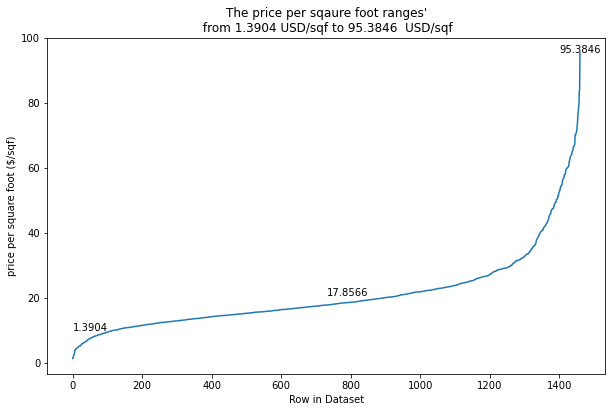

In [111]:
# initialize a figure with width 10 and height 6.18
fig, ax = plt.subplots(1,1, figsize=(10, 6.18));
# plot the normalized, ordered price per square foot
df.plot(y="norm_price_lot", ax = ax, legend = None);
plt.text(df['norm_price_lot'].min(),10,str(round(df["norm_price_lot"].min(),4)))
plt.text(1400,df['norm_price_lot'].max(),str(round(df["norm_price_lot"].max(),4)))
plt.text(1460/2,df['norm_price_lot'].median()+3,str(round(df["norm_price_lot"].median(),4)))
# add labels and title
ax.set_xlabel("Row in Dataset")
ax.set_ylabel("price per square foot ($/sqf)")
ax.set_title(f"The price per sqaure foot ranges'\n from {round(df['norm_price_lot'].min(),4)} USD/sqf to {round(df['norm_price_lot'].max(),4)}  USD/sqf");


### Add relevant information/annotations (these are suggestions)
Examples of functions that may help you:
- plt.text(x,y,"text")  

To provide more insights, we may wish to highlight some points in the plot, as we did in class - when we first saw this representation. You may find the following function useful:
- df[["col_name"]].describe() provides you with the min, max, mean, median,... 
of the column "col_name" 

#### Note that these are suggestions. 
-- We will leave it up to you to decide what to add  
-- Adding **one extra meaningful bit** of info will get you the full credit.   
-- I advise you to first finish the rest of the exam and then come back here to finish this part.

## 2 - The second main driver should be the condition of the real estate
Use violin plots to check the distribution of prices with respect to the overall condition, which is represented by the variable OverallCond.   
- The expected result is something similar to the figure below:  

<img src="violin_plot.png" width=400>

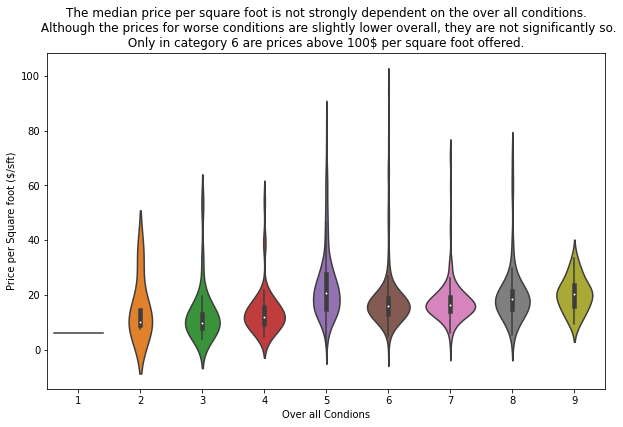

In [34]:
# initialize a figure of size 10, 6.18
fig, ax = plt.subplots(1,1, figsize=(10, 6.18));
# plot norm_price_lot with respect to OverallCond using a violin plot
sns.violinplot(x=df["OverallCond"], 
               y=df["norm_price_lot"],
               ax=ax);

# add title and labels
ax.set_xlabel("Over all Condions")
ax.set_ylabel("Price per Square foot ($/sft)")
ax.set_title("The median price per square foot is not strongly dependent on the over all conditions.\n Although the prices for worse conditions are slightly lower overall, they are not significantly so.\n Only in category 6 are prices above 100$ per square foot offered. ");


### Add relevant information/annotations
Things to consider:  
- those looking at the plot do not know what the overall condition means without looking at the data dictionary   
- knowing the size of each category may give extra insights

#### Note that these are suggestions. 
-- We will leave it up to you to decide what to add  
-- Adding **one extra meaningful bit** of info will get you the full credit.   
-- I advice you to first finish the rest of the exam, and then come back here to finish this part.

## 3 - Finally, the neighborhood is really important as a price driver
We want to see the average price per square foot in different neighborhoods.  
Use a bar plot with mean to represent the value per neighborhood.
The following figure shows an example of the representation that we want to see:  
<img src="bar_mean_age.png" width=400>

### Data preparation
We need a dataframe with the name of the neighborhoods associated with the mean value of the price in that neighborhood. There are different ways of computing this.  
1. pivot table
2. groupby

In the following, we guide you through both examples. **Choose the one you are more comfortable with.**   
- Delete the one you do not use to avoid mistakes

In [35]:
## OPTION 1 -- PIVOT!
# compute a pivot table choosing the Neighborhood as columns,
# and selecting only the norm_price_log

# in class, we concatenated different metrics - and ended up with a dataframe
# here, we end up with just one metric and need to convert the result to a dataframe
# use .to_frame("norm_price_lot") to convert the result into a dataframe

# do not forget to order by the mean 
df

,LotArea,LivingArea,NumberBedroom,TotalRooms,Neighborhood,YearBuilt,YearRemodAdd,YrSold,MoSold,KitchenQual,Condition1,OverallCond,SalePrice,norm_price_lot
0,164660,1786,3,7,Timber,1965,1965,2008,8,TA,Norm,6,228950,1.390441
1,159000,2144,4,7,ClearCr,1958,2006,2007,6,Gd,Norm,7,277000,1.742138
2,215245,2036,3,8,Timber,1965,1965,2009,6,TA,Norm,5,375000,1.742201
3,63887,5642,3,12,Edwards,2008,2008,2008,1,Ex,Feedr,5,160000,2.504422
4,115149,1824,2,5,ClearCr,1971,2002,2007,6,Gd,Norm,5,302000,2.622689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2280,1501,3,6,Somerst,1999,1999,2008,8,TA,Norm,5,179400,78.684211
1456,2117,1512,2,4,Somerst,2000,2000,2007,6,Gd,Norm,5,168500,79.593765
1457,2117,1525,3,5,Somerst,2000,2000,2007,6,Gd,Norm,5,177000,83.608880
1458,2117,1573,3,5,Somerst,2000,2000,2010,6,Gd,Norm,5,177500,83.845064


In [112]:
## OPTION 2 -- Groupby!
# compute the mean per Neighborhood using a groupby and mean as aggregation function
df_1 = df.groupby(["Neighborhood"], as_index=True).mean()
# do not forget to order by the mean 
df_1.sort_values("norm_price_lot", inplace = True)
#df_1.reset_index(inplace=True, drop=True)

df_1

,LotArea,LivingArea,NumberBedroom,TotalRooms,YearBuilt,YearRemodAdd,YrSold,MoSold,OverallCond,SalePrice,norm_price_lot
Neighborhood,,,,,,,,,,,
IDOTRR,8109.162162,1142.297297,2.513514,5.783784,1927.945946,1964.378378,2007.756757,6.189189,5.540541,100123.783784,13.179700
ClearCr,30875.750000,1788.107143,2.892857,6.892857,1966.571429,1983.750000,2007.785714,6.785714,5.678571,212565.428571,13.780805
Sawyer,10459.283784,1215.135135,2.932432,5.945946,1963.675676,1978.527027,2007.891892,5.864865,5.810811,136793.135135,13.966735
NAmes,10139.915556,1310.311111,2.933333,6.106667,1959.995556,1971.622222,2007.866667,6.493333,5.791111,145847.080000,15.086940
Edwards,10218.650000,1340.040000,2.880000,6.120000,1955.970000,1975.110000,2007.940000,5.750000,5.440000,128219.700000,15.475815
Mitchel,11624.285714,1294.204082,2.755102,5.918367,1981.755102,1985.551020,2007.755102,6.163265,5.367347,156270.122449,16.430881
NWAmes,11833.630137,1727.780822,3.287671,7.246575,1975.630137,1981.520548,2007.821918,6.123288,5.945205,189050.068493,16.505557
OldTown,8207.061947,1479.725664,2.814159,6.539823,1922.884956,1975.424779,2007.787611,6.539823,6.353982,128225.300885,17.036698
BrkSide,7360.413793,1203.068966,2.603448,5.586207,1931.431034,1968.586207,2007.672414,6.206897,6.137931,124834.051724,17.500370


In [51]:
len(df_1)

25

### Bar plot

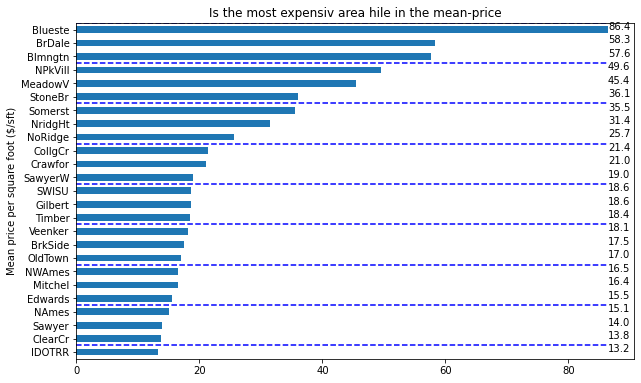

In [113]:
#initialize figure with dimensions 6.18, 10
fig, ax = plt.subplots(1,1, figsize=(10, 6.18));
# plot the mean as bars  
df_1.plot(kind = "barh", y = "norm_price_lot", ax = ax, legend = None);

# add labels and title
plt.ylabel("Mean price per square foot ($/sft)")
plt.title("Is the most expensiv area hile in the mean-price")
norm_p = df_1["norm_price_lot"]
norm_p_m = df_1["norm_price_lot"].max()
[plt.plot([0,norm_p_m], [i+0.5,i+0.5], "b--") for i in range(0,len(df_1),3)];
[plt.text(max(norm_p), (i), str(round(norm_p[i],1))) for i in range(len(df_1))];

### Add relevant information/annotations
Things to consider:
- As we saw in class, if the list is long, it may be difficult to associate the size of the bar with a specific number
- Lines also help 

#### Note that these are suggestions. 
-- We will leave it up to you to decide what to add  
-- Adding **one extra meaningful bit** of info will get you the full credit.   
-- I advise you to first finish the rest of the exam and then come back here to finish this part.

# 4 - At last, let us check how prices change with the age of the building
We want to plot a time series, where the x-axis is the age of the building and the y is the price per square foot as computed above. We want to see an estimation of the standard deviation as well.  
The overall result should be something similar to the plot below:  
<img src = "timeseries.png" width=300>


In [63]:
df

,LotArea,LivingArea,NumberBedroom,TotalRooms,Neighborhood,YearBuilt,YearRemodAdd,YrSold,MoSold,KitchenQual,Condition1,OverallCond,SalePrice,norm_price_lot
0,164660,1786,3,7,Timber,1965,1965,2008,8,TA,Norm,6,228950,1.390441
1,159000,2144,4,7,ClearCr,1958,2006,2007,6,Gd,Norm,7,277000,1.742138
2,215245,2036,3,8,Timber,1965,1965,2009,6,TA,Norm,5,375000,1.742201
3,63887,5642,3,12,Edwards,2008,2008,2008,1,Ex,Feedr,5,160000,2.504422
4,115149,1824,2,5,ClearCr,1971,2002,2007,6,Gd,Norm,5,302000,2.622689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2280,1501,3,6,Somerst,1999,1999,2008,8,TA,Norm,5,179400,78.684211
1456,2117,1512,2,4,Somerst,2000,2000,2007,6,Gd,Norm,5,168500,79.593765
1457,2117,1525,3,5,Somerst,2000,2000,2007,6,Gd,Norm,5,177000,83.608880
1458,2117,1573,3,5,Somerst,2000,2000,2010,6,Gd,Norm,5,177500,83.845064


### Data preparation

In [114]:
# compute the age of the building by subtracting the construction year (YrSold) to the sale year (YearBuilt)
# add the result to a new column "age"
df["age"] = df["YrSold"] - df["YearBuilt"]
df.sort_values("age", inplace = True)
df.reset_index(inplace=True, drop=True)
df

,LotArea,LivingArea,NumberBedroom,TotalRooms,Neighborhood,YearBuilt,YearRemodAdd,YrSold,MoSold,KitchenQual,Condition1,OverallCond,SalePrice,norm_price_lot,age
0,12438,2576,4,10,StoneBr,2006,2006,2006,7,Ex,Norm,5,361919,29.097845,0
1,14587,1506,2,6,Somerst,2008,2008,2008,8,Ex,Norm,5,264132,18.107356,0
2,8089,1419,2,7,StoneBr,2007,2007,2007,10,Gd,Norm,6,392000,48.460873,0
3,10991,1571,3,7,Timber,2007,2007,2007,12,Gd,Norm,5,239000,21.745064,0
4,7200,1262,2,5,Somerst,2006,2006,2006,5,Gd,Norm,5,185000,25.694444,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,9900,2210,5,8,OldTown,1880,1950,2007,5,Fa,Norm,4,117500,11.868687,127
1456,18386,3493,3,10,OldTown,1880,2002,2008,5,Gd,Norm,9,295000,16.044817,128
1457,11700,2640,4,8,OldTown,1880,2003,2009,5,Gd,Norm,7,265979,22.733248,129
1458,6342,1020,2,6,Sawyer,1875,1996,2010,5,TA,Feedr,8,94000,14.821823,135


### Line plot

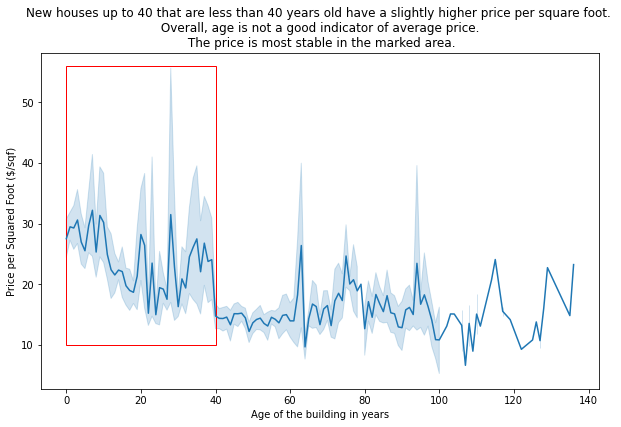

In [115]:
#initialize figure with size 10, 6.18
fig, ax = plt.subplots(1,1, figsize=(10, 6.18));
#add line with std deviation
sns.lineplot(x="age", y="norm_price_lot", data=df);

#add title and labels
ax.set_ylabel("Price per Squared Foot ($/sqf)");
ax.set_xlabel("Age of the building in years")
plt.title("New houses up to 40 that are less than 40 years old have a slightly higher price per square foot. \n Overall, age is not a good indicator of average price. \n The price is most stable in the marked area.");

import matplotlib.patches as patches
rect = patches.Rectangle((0,10),40,46,linewidth=1,edgecolor='r',facecolor='none');
ax.add_patch(rect);

### Add relevant information/annotations
Things to consider:
- you may want to highlight a part of the time series that might be relevant for the client (use add_patch and plt.Rectangle as we saw in classes)
- you may wish to highlight a specific x value, or max/min y-value.

#### Note that these are suggestions. 
- We will leave it up to you to decide what to add  
- Adding **one extra meaningful bit** of info will get you the full credit.   
- I advise you to first finish the rest of the exam and then come back here to finish this part.

# You will now present your results to your client.
Note that he wants to buy a house at the market median value, in a regular neighborhood, and sell it after 5 years. 

You have 3 slides to present. What should be the titles? 
- Write your answers using the markdown below.
- Remember the pattern for storytelling - your story may go beyond the plots we just saw. Just follow the pattern.
- 1/20

1. 
1. 
1. 

#Presentation

In [116]:
df["norm_price_lot"].median()

17.856628456381724

The well-known principle of "location is the deciding factor" still applies when buying a house. The range of house prices per square foot ranges from 13.2 to 86.4 USD/sqft.

With your asking price from around 17.85 USD/sqft, 2 districts are particularly attractive. "Old Town" and "Brk Side"

And a special opportunity to realise a profit on a sale after 5 years is to invest in houses that are not older than 30 years. 

Since the prices per square foot do not vary much depending on the current condition, I would recommend, and that probably sounds very surprising now, that you buy a house in condition 3 or 4 and not maintain it again after the 5 years. As the additional investment does not pay off. 